In [1]:
import pandas as pd
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
%matplotlib inline

In [2]:
df = pd.read_csv('../Files/train.csv')

In [3]:
df['datetime'] = pd.to_datetime(df['datetime'])
df['year'] = [x.year for x in df['datetime']]
df['month'] = [x.month for x in df['datetime']]
df['weekday'] = [x.dayofweek for x in df['datetime']]
df['hour'] = [x.hour for x in df['datetime']]

In [4]:
df = df.drop('datetime', axis=1)

In [5]:
df_test = pd.read_csv('../Files/test.csv')

In [6]:
df_test = pd.read_csv('../Files/test.csv')
df_test['datetime'] = pd.to_datetime(df_test['datetime'])
df_test['year'] = [x.year for x in df_test['datetime']]
df_test['month'] = [x.month for x in df_test['datetime']]
df_test['weekday'] = [x.dayofweek for x in df_test['datetime']]
df_test['hour'] = [x.hour for x in df_test['datetime']]
df_test.drop('datetime', axis=1)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,weekday,hour
0,1,0,1,1,10.66,11.365,56,26.0027,2011,1,3,0
1,1,0,1,1,10.66,13.635,56,0.0000,2011,1,3,1
2,1,0,1,1,10.66,13.635,56,0.0000,2011,1,3,2
3,1,0,1,1,10.66,12.880,56,11.0014,2011,1,3,3
4,1,0,1,1,10.66,12.880,56,11.0014,2011,1,3,4
5,1,0,1,1,9.84,11.365,60,15.0013,2011,1,3,5
6,1,0,1,1,9.02,10.605,60,15.0013,2011,1,3,6
7,1,0,1,1,9.02,10.605,55,15.0013,2011,1,3,7
8,1,0,1,1,9.02,10.605,55,19.0012,2011,1,3,8
9,1,0,1,2,9.84,11.365,52,15.0013,2011,1,3,9


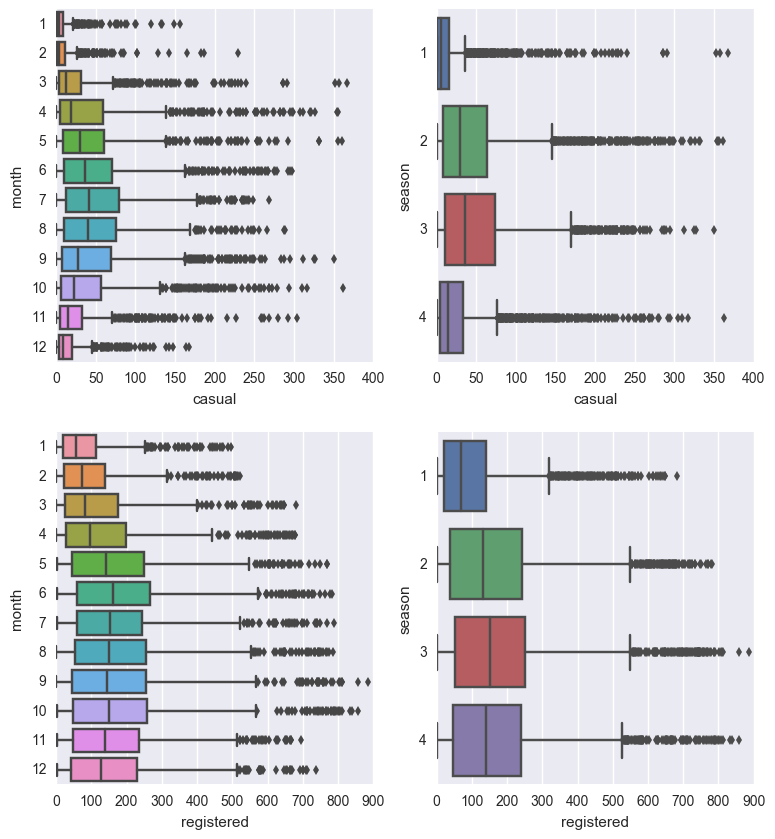

In [27]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(9, 10)
#sn.boxplot(data=df,y="casual",x="weekday", orient="v",ax=axes[0][0])
#sn.boxplot(data=df,y="registered",x="weekday",orient="v",ax=axes[0][1])
sn.boxplot(data=df,y="month",x="casual",orient="h",ax=axes[0][0])
sn.boxplot(data=df,y="season",x="casual",orient="h",ax=axes[0][1])
sn.boxplot(data=df,y="month",x="registered",orient="h",ax=axes[1][0])
sn.boxplot(data=df,y="season",x="registered",orient="h",ax=axes[1][1])
#sn.boxplot(data=df,y="month",x="registered",orient="h",ax=axes[1][1])

In [8]:
df_working_day = df[(df['workingday'] == 1) & (df['weekday'].isin({5,6}))]
print(df_working_day)

Empty DataFrame
Columns: [season, holiday, workingday, weather, temp, atemp, humidity, windspeed, casual, registered, count, year, month, weekday, hour]
Index: []


In [9]:
df_working_day = df[(df['workingday'] == 0) & (~df['weekday'].isin({5,6}))]
print(round(df_working_day.shape[0]/24))

13


In [12]:
#df_casual = df.drop(['registered', 'count'], axis=1)
#df_casual = df.drop(['registered', 'count', 'atemp'], axis=1)
df_casual = df.drop(['registered', 'count', 'atemp','season'], axis=1)

In [13]:
#df_registered = df.drop(['casual', 'count'], axis=1)
#df_registered = df.drop(['casual', 'count', 'atemp'], axis=1)
df_registered = df.drop(['casual', 'count', 'atemp','season'], axis=1)

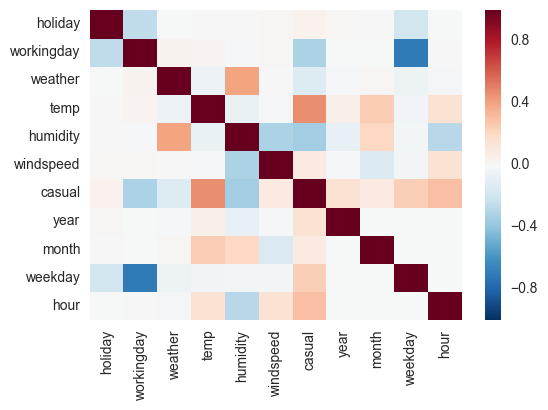

In [14]:
corr_casual = df_casual.corr()
sn.heatmap(corr_casual, xticklabels=corr_casual.columns.values, yticklabels=corr_casual.columns.values)

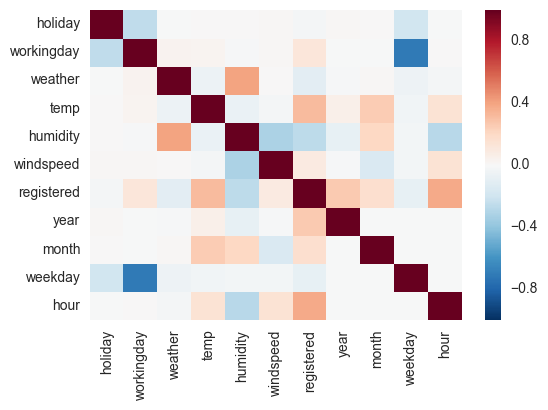

In [15]:
corr_registered = df_registered.corr()
sn.heatmap(corr_registered, xticklabels=corr_registered.columns.values, yticklabels=corr_registered.columns.values)

In [16]:
corr_registered

,holiday,workingday,weather,temp,humidity,windspeed,registered,year,month,weekday,hour
holiday,1.000000,-0.250491,-0.007074,0.000295,0.001929,0.008409,-0.020956,0.012021,0.001731,-0.191832,-0.000354
workingday,-0.250491,1.000000,0.033772,0.029966,-0.010880,0.013373,0.119460,-0.002482,-0.003394,-0.704267,0.002780
weather,-0.007074,0.033772,1.000000,-0.055035,0.406244,0.007261,-0.109340,-0.012548,0.012144,-0.047692,-0.022740
temp,0.000295,0.029966,-0.055035,1.000000,-0.064949,-0.017852,0.318571,0.061226,0.257589,-0.038466,0.145430
humidity,0.001929,-0.010880,0.406244,-0.064949,1.000000,-0.318607,-0.265458,-0.078606,0.204537,-0.026507,-0.278011
windspeed,0.008409,0.013373,0.007261,-0.017852,-0.318607,1.000000,0.091052,-0.015221,-0.150192,-0.024804,0.146631
registered,-0.020956,0.119460,-0.109340,0.318571,-0.265458,0.091052,1.000000,0.264265,0.169451,-0.084427,0.380540
year,0.012021,-0.002482,-0.012548,0.061226,-0.078606,-0.015221,0.264265,1.000000,-0.004932,-0.003785,-0.004234
month,0.001731,-0.003394,0.012144,0.257589,0.204537,-0.150192,0.169451,-0.004932,1.000000,-0.002266,-0.006818
weekday,-0.191832,-0.704267,-0.047692,-0.038466,-0.026507,-0.024804,-0.084427,-0.003785,-0.002266,1.000000,-0.002925


In [17]:
corr_casual

,holiday,workingday,weather,temp,humidity,windspeed,casual,year,month,weekday,hour
holiday,1.000000,-0.250491,-0.007074,0.000295,0.001929,0.008409,0.043799,0.012021,0.001731,-0.191832,-0.000354
workingday,-0.250491,1.000000,0.033772,0.029966,-0.010880,0.013373,-0.319111,-0.002482,-0.003394,-0.704267,0.002780
weather,-0.007074,0.033772,1.000000,-0.055035,0.406244,0.007261,-0.135918,-0.012548,0.012144,-0.047692,-0.022740
temp,0.000295,0.029966,-0.055035,1.000000,-0.064949,-0.017852,0.467097,0.061226,0.257589,-0.038466,0.145430
humidity,0.001929,-0.010880,0.406244,-0.064949,1.000000,-0.318607,-0.348187,-0.078606,0.204537,-0.026507,-0.278011
windspeed,0.008409,0.013373,0.007261,-0.017852,-0.318607,1.000000,0.092276,-0.015221,-0.150192,-0.024804,0.146631
casual,0.043799,-0.319111,-0.135918,0.467097,-0.348187,0.092276,1.000000,0.145241,0.092722,0.246959,0.302045
year,0.012021,-0.002482,-0.012548,0.061226,-0.078606,-0.015221,0.145241,1.000000,-0.004932,-0.003785,-0.004234
month,0.001731,-0.003394,0.012144,0.257589,0.204537,-0.150192,0.092722,-0.004932,1.000000,-0.002266,-0.006818
weekday,-0.191832,-0.704267,-0.047692,-0.038466,-0.026507,-0.024804,0.246959,-0.003785,-0.002266,1.000000,-0.002925


In [16]:
df_casual

,holiday,workingday,temp,humidity,windspeed,casual,year,month,weekday,hour
0,0,0,9.84,81,0.0000,3,2011,1,5,0
1,0,0,9.02,80,0.0000,8,2011,1,5,1
2,0,0,9.02,80,0.0000,5,2011,1,5,2
3,0,0,9.84,75,0.0000,3,2011,1,5,3
4,0,0,9.84,75,0.0000,0,2011,1,5,4
5,0,0,9.84,75,6.0032,0,2011,1,5,5
6,0,0,9.02,80,0.0000,2,2011,1,5,6
7,0,0,8.20,86,0.0000,1,2011,1,5,7
8,0,0,9.84,75,0.0000,1,2011,1,5,8
9,0,0,13.12,76,0.0000,8,2011,1,5,9


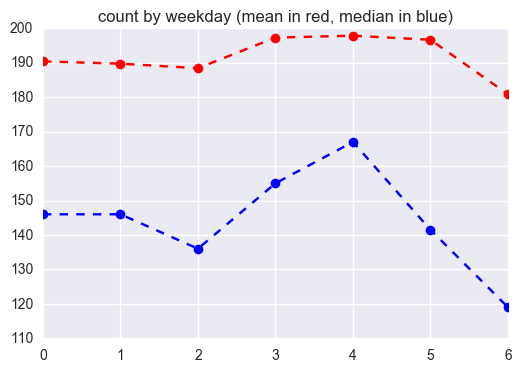

In [19]:
mean_count = []
median_count = []
for i in range(0,7) :
    mean_count.append(df[df['weekday']==i]['count'].mean())
    median_count.append(df[df['weekday']==i]['count'].median())
    
plt.title('count by weekday (mean in red, median in blue)')
plt.plot(mean_count,'r--', mean_count,'ro')
plt.plot(median_count,'b--', median_count,'bo')
#plt.xlim(-0.5,6.5)
#plt.ylim(-10,70)

(-10, 70)

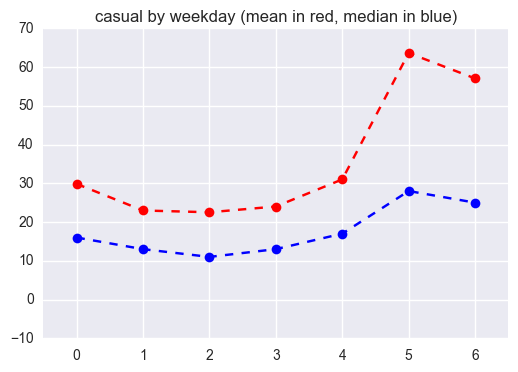

In [17]:
mean_casual = []
median_casual = []
for i in range(0,7) :
    mean_casual.append(df_casual[df_casual['weekday']==i]['casual'].mean())
    median_casual.append(df_casual[df_casual['weekday']==i]['casual'].median())
    
plt.title('casual by weekday (mean in red, median in blue)')
plt.plot(mean_casual,'r--', mean_casual,'ro')
plt.plot(median_casual,'b--', median_casual,'bo')
plt.xlim(-0.5,6.5)
plt.ylim(-10,70)

(80, 190)

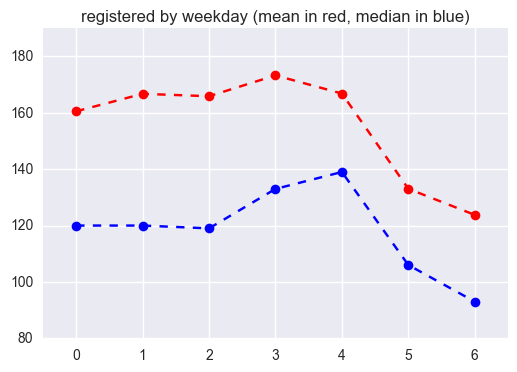

In [18]:
mean_registered = []
median_registered = []
for i in range(0,7) :
    mean_registered.append(df_registered[df_registered['weekday']==i]['registered'].mean())
    median_registered.append(df_registered[df_registered['weekday']==i]['registered'].median())
    
plt.title('registered by weekday (mean in red, median in blue)')
plt.plot(mean_registered,'r--', mean_registered,'ro')
plt.plot(median_registered,'b--', median_registered,'bo')
plt.xlim(-0.5,6.5)
plt.ylim(80,190)

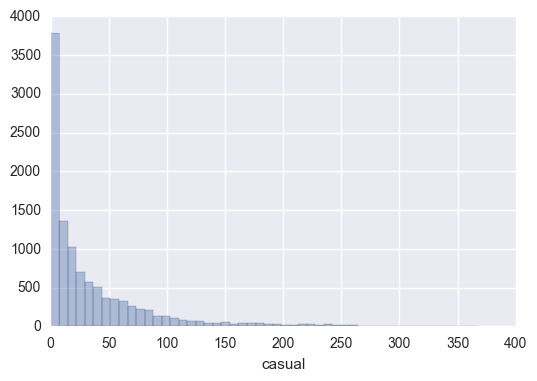

In [19]:
sn.distplot(df_casual['casual'], kde=False)

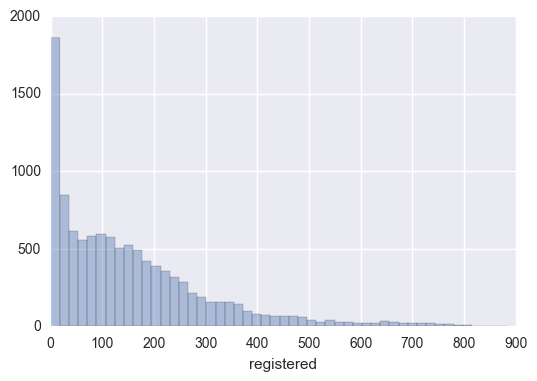

In [20]:
sn.distplot(df_registered['registered'], kde=False)

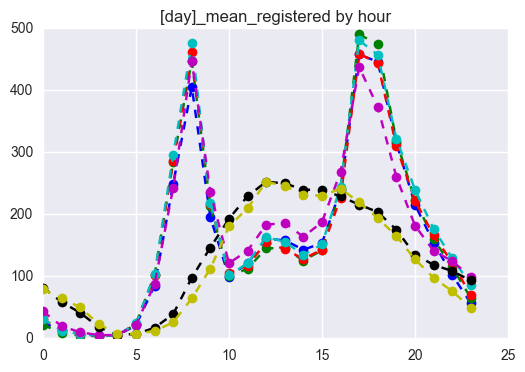

In [21]:
monday_mean_registered = []
tuesday_mean_registered = []
wednesday_mean_registered = []
thursday_mean_registered = []
friday_mean_registered = []
saturday_mean_registered = []
sunday_mean_registered = []
for i in range(0,24) :
    monday_mean_registered.append(df_registered[(df_registered['weekday']==0) & (df_registered['hour']==i)]['registered'].mean())
    tuesday_mean_registered.append(df_registered[(df_registered['weekday']==1) & (df_registered['hour']==i)]['registered'].mean())
    wednesday_mean_registered.append(df_registered[(df_registered['weekday']==2) & (df_registered['hour']==i)]['registered'].mean())
    thursday_mean_registered.append(df_registered[(df_registered['weekday']==3) & (df_registered['hour']==i)]['registered'].mean())
    friday_mean_registered.append(df_registered[(df_registered['weekday']==4) & (df_registered['hour']==i)]['registered'].mean())
    saturday_mean_registered.append(df_registered[(df_registered['weekday']==5) & (df_registered['hour']==i)]['registered'].mean())
    sunday_mean_registered.append(df_registered[(df_registered['weekday']==6) & (df_registered['hour']==i)]['registered'].mean())
    
plt.title('[day]_mean_registered by hour')
plt.plot(monday_mean_registered,'b--', monday_mean_registered,'bo')
plt.plot(tuesday_mean_registered,'g--', tuesday_mean_registered,'go')
plt.plot(wednesday_mean_registered,'r--', wednesday_mean_registered,'ro')
plt.plot(thursday_mean_registered,'c--', thursday_mean_registered,'co')
plt.plot(friday_mean_registered,'m--', friday_mean_registered,'mo')
plt.plot(saturday_mean_registered,'k--', saturday_mean_registered,'ko')
plt.plot(sunday_mean_registered,'y--', sunday_mean_registered,'yo')

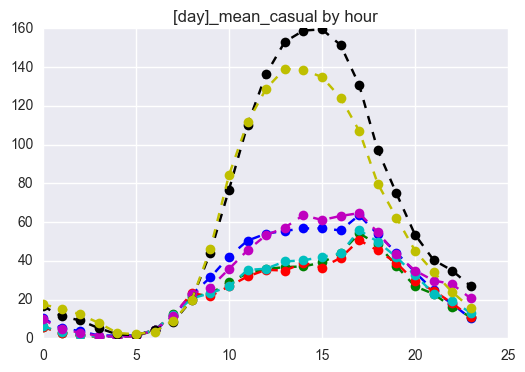

In [22]:
monday_mean_casual = []
tuesday_mean_casual = []
wednesday_mean_casual = []
thursday_mean_casual = []
friday_mean_casual = []
saturday_mean_casual = []
sunday_mean_casual = []
for i in range(0,24) :
    monday_mean_casual.append(df_casual[(df_casual['weekday']==0) & (df_casual['hour']==i)]['casual'].mean())
    tuesday_mean_casual.append(df_casual[(df_casual['weekday']==1) & (df_casual['hour']==i)]['casual'].mean())
    wednesday_mean_casual.append(df_casual[(df_casual['weekday']==2) & (df_casual['hour']==i)]['casual'].mean())
    thursday_mean_casual.append(df_casual[(df_casual['weekday']==3) & (df_casual['hour']==i)]['casual'].mean())
    friday_mean_casual.append(df_casual[(df_casual['weekday']==4) & (df_casual['hour']==i)]['casual'].mean())
    saturday_mean_casual.append(df_casual[(df_casual['weekday']==5) & (df_casual['hour']==i)]['casual'].mean())
    sunday_mean_casual.append(df_casual[(df_casual['weekday']==6) & (df_casual['hour']==i)]['casual'].mean())
    
plt.title('[day]_mean_casual by hour')
plt.plot(monday_mean_casual,'b--', monday_mean_casual,'bo')
plt.plot(tuesday_mean_casual,'g--', tuesday_mean_casual,'go')
plt.plot(wednesday_mean_casual,'r--', wednesday_mean_casual,'ro')
plt.plot(thursday_mean_casual,'c--', thursday_mean_casual,'co')
plt.plot(friday_mean_casual,'m--', friday_mean_casual,'mo')
plt.plot(saturday_mean_casual,'k--', saturday_mean_casual,'ko')
plt.plot(sunday_mean_casual,'y--', sunday_mean_casual,'yo')

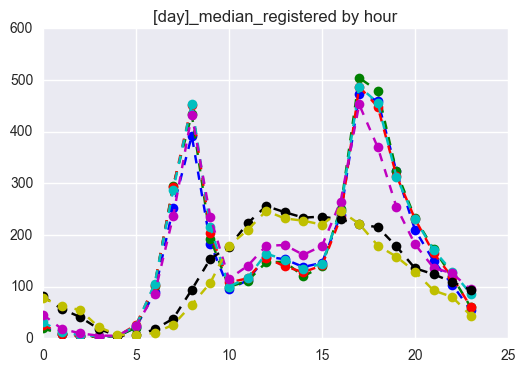

In [23]:
monday_median_registered = []
tuesday_median_registered = []
wednesday_median_registered = []
thursday_median_registered = []
friday_median_registered = []
saturday_median_registered = []
sunday_median_registered = []
for i in range(0,24) :
    monday_median_registered.append(df_registered[(df_registered['weekday']==0) & (df_registered['hour']==i)]['registered'].median())
    tuesday_median_registered.append(df_registered[(df_registered['weekday']==1) & (df_registered['hour']==i)]['registered'].median())
    wednesday_median_registered.append(df_registered[(df_registered['weekday']==2) & (df_registered['hour']==i)]['registered'].median())
    thursday_median_registered.append(df_registered[(df_registered['weekday']==3) & (df_registered['hour']==i)]['registered'].median())
    friday_median_registered.append(df_registered[(df_registered['weekday']==4) & (df_registered['hour']==i)]['registered'].median())
    saturday_median_registered.append(df_registered[(df_registered['weekday']==5) & (df_registered['hour']==i)]['registered'].median())
    sunday_median_registered.append(df_registered[(df_registered['weekday']==6) & (df_registered['hour']==i)]['registered'].median())
    
plt.title('[day]_median_registered by hour')
plt.plot(monday_median_registered,'b--', monday_median_registered,'bo')
plt.plot(tuesday_median_registered,'g--', tuesday_median_registered,'go')
plt.plot(wednesday_median_registered,'r--', wednesday_median_registered,'ro')
plt.plot(thursday_median_registered,'c--', thursday_median_registered,'co')
plt.plot(friday_median_registered,'m--', friday_median_registered,'mo')
plt.plot(saturday_median_registered,'k--', saturday_median_registered,'ko')
plt.plot(sunday_median_registered,'y--', sunday_median_registered,'yo')

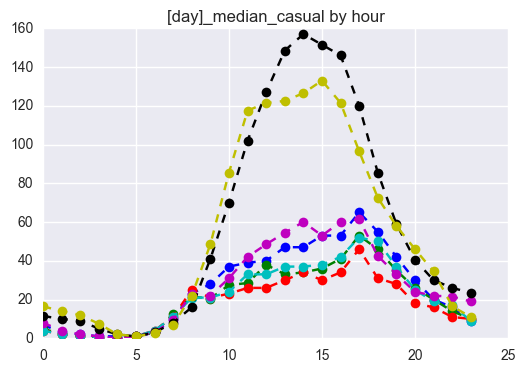

In [24]:
monday_median_casual = []
tuesday_median_casual = []
wednesday_median_casual = []
thursday_median_casual = []
friday_median_casual = []
saturday_median_casual = []
sunday_median_casual = []
for i in range(0,24) :
    monday_median_casual.append(df_casual[(df_casual['weekday']==0) & (df_casual['hour']==i)]['casual'].median())
    tuesday_median_casual.append(df_casual[(df_casual['weekday']==1) & (df_casual['hour']==i)]['casual'].median())
    wednesday_median_casual.append(df_casual[(df_casual['weekday']==2) & (df_casual['hour']==i)]['casual'].median())
    thursday_median_casual.append(df_casual[(df_casual['weekday']==3) & (df_casual['hour']==i)]['casual'].median())
    friday_median_casual.append(df_casual[(df_casual['weekday']==4) & (df_casual['hour']==i)]['casual'].median())
    saturday_median_casual.append(df_casual[(df_casual['weekday']==5) & (df_casual['hour']==i)]['casual'].median())
    sunday_median_casual.append(df_casual[(df_casual['weekday']==6) & (df_casual['hour']==i)]['casual'].median())
    
plt.title('[day]_median_casual by hour')
plt.plot(monday_median_casual,'b--', monday_median_casual,'bo')
plt.plot(tuesday_median_casual,'g--', tuesday_median_casual,'go')
plt.plot(wednesday_median_casual,'r--', wednesday_median_casual,'ro')
plt.plot(thursday_median_casual,'c--', thursday_median_casual,'co')
plt.plot(friday_median_casual,'m--', friday_median_casual,'mo')
plt.plot(saturday_median_casual,'k--', saturday_median_casual,'ko')
plt.plot(sunday_median_casual,'y--', sunday_median_casual,'yo')